### Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

For Train Data

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
label_encoder = LabelEncoder()

In [7]:
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [8]:
data['Embarked'].unique()

array([2, 0, 1, 3])

In [9]:
data['Sex'] = label_encoder.fit_transform(data['Sex'])

In [10]:
data['Sex'].unique()

array([1, 0])

In [11]:
data.drop(['Name', 'Cabin', 'Ticket'], axis = 1, inplace = True)

In [12]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [13]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [14]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64


In [15]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [16]:
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


#### For Test Data

In [17]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder = LabelEncoder()

In [21]:
test['Embarked'] = label_encoder.fit_transform(test['Embarked'])

In [22]:
test['Embarked'].unique()

array([1, 2, 0])

In [23]:
test['Sex'] = label_encoder.fit_transform(test['Sex'])

In [24]:
test['Sex'].unique()

array([1, 0])

In [25]:
test.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [26]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [27]:
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


### Model KNN From Scratch

In [28]:
from scipy import stats

class KNN:
    
    def __init__(self, k=7):
        self.k = k
        self.X_train = None
        self.y_train = None
        
    @staticmethod
    def _euclidean_distance(p, q):
        return np.sqrt(np.sum((p - q) ** 2))
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predictions = []
        for p in X:
            euc_distances = [self._euclidean_distance(p, q) for q in self.X_train]
            sorted_k = np.argsort(euc_distances)[:self.k]
            k_nearest = [self.y_train[y] for y in sorted_k]
            predictions.append(stats.mode(k_nearest)[0][0])
            
        return np.array(predictions)

In [29]:
train_data = np.array(data.drop("Survived", axis = 1))
preds_data = np.array(data["Survived"])
predict_data = np.array(test)

In [30]:
model = KNN()
model.fit(train_data, preds_data)
preds = model.predict(predict_data)

In [31]:
survived_df = pd.DataFrame({"Survived":preds})
PassengerId_df = test["PassengerId"]

In [32]:
PassengerId_df

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [33]:
survived_df

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,0
415,0
416,0


In [34]:
result = pd.concat([PassengerId_df,survived_df], axis=1, join='inner')
display(result)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [35]:
result.to_csv('results.csv', index=False)

### Ploting

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(data.drop("Survived",axis = 1)), np.array(data["Survived"]), test_size=0.3, random_state=42)


In [37]:
from sklearn.metrics import accuracy_score
evals = []

for k in range(1, 16, 2):
    model = KNN(k=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    evals.append({'k': k, 'accuracy': accuracy})

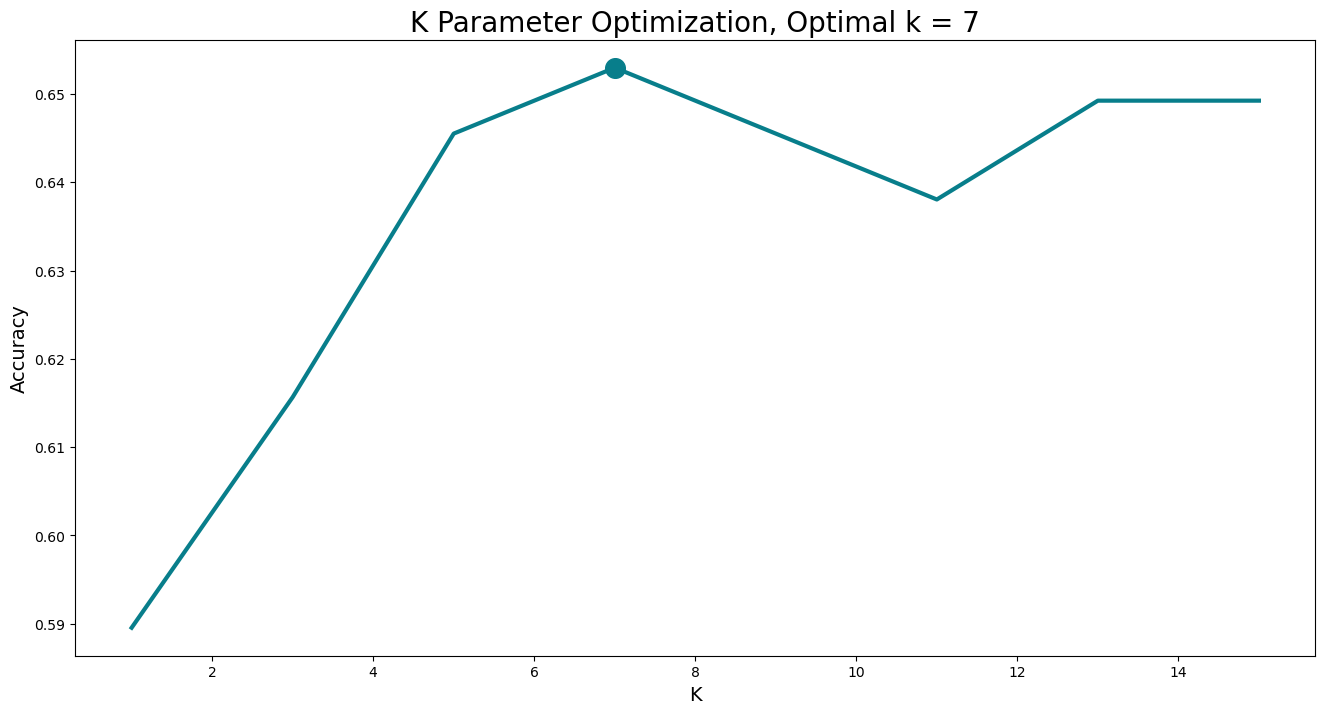

In [38]:
import matplotlib.pyplot as plt

evals = pd.DataFrame(evals)
best_k = evals.sort_values(by='accuracy', ascending=False).iloc[0]

plt.figure(figsize=(16, 8))
plt.plot(evals['k'], evals['accuracy'], lw=3, c='#087E8B')
plt.scatter(best_k['k'], best_k['accuracy'], s=200, c='#087E8B')
plt.title(f"K Parameter Optimization, Optimal k = {int(best_k['k'])}", size=20)
plt.xlabel('K', size=14)
plt.ylabel('Accuracy', size=14)
plt.show()